Assignment #2 Exploratory data analysis

In [13]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

df1 = pd.read_csv('steps.csv', sep=';') #reformat the dataframe with the correct seperators
df1.head() #output of the rows

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2 = pd.read_csv('survey.csv')
df2.head() #output of the rows

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [17]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier - merge two files
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [19]:
list_sum = df.mean(axis=1)
print(list_sum)
df['mean_count'] = list_sum
print(df['mean_count'])

0       9907.035294
1       5519.720238
2       8032.196078
3       2917.120000
4       4866.016949
           ...     
924     5966.979167
925     4385.636364
926     9797.142857
927    14781.639535
928     7325.781690
Length: 929, dtype: float64
0       9907.035294
1       5519.720238
2       8032.196078
3       2917.120000
4       4866.016949
           ...     
924     5966.979167
925     4385.636364
926     9797.142857
927    14781.639535
928     7325.781690
Name: mean_count, Length: 929, dtype: float64


In [21]:
df_sub = df[['mean_count','height','weight','gender', 'age','city', 'education_1']]
df_sub.head()

,mean_count,height,weight,gender,age,city,education_1
0,9907.035294,178.0,98.0,Male,25-34,Bordeaux,Master or doctorate
1,5519.720238,180.0,77.0,Male,35-44,Lille,Bachelor
2,8032.196078,180.0,83.0,Male,25-34,Montpellier,Master or doctorate
3,2917.120000,178.0,80.0,Male,<25,Lyon,Bachelor
4,4866.016949,167.0,61.0,Female,25-34,Montpellier,Bachelor


In [22]:
df_new = df_sub[(df_sub["mean_count"] > 100) & (df_sub["weight"] < 200) & (df_sub["weight"] > 30) & (df_sub["mean_count"] < 50000)]
df_sub = df_sub.dropna()
df_sub.head()

,mean_count,height,weight,gender,age,city,education_1
0,9907.035294,178.0,98.0,Male,25-34,Bordeaux,Master or doctorate
1,5519.720238,180.0,77.0,Male,35-44,Lille,Bachelor
2,8032.196078,180.0,83.0,Male,25-34,Montpellier,Master or doctorate
3,2917.120000,178.0,80.0,Male,<25,Lyon,Bachelor
4,4866.016949,167.0,61.0,Female,25-34,Montpellier,Bachelor


Distribution Plotting

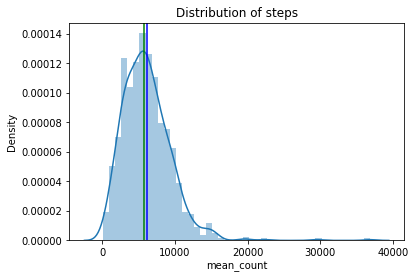

In [23]:
mean_count = df_new['mean_count']
mean_size = df_new['mean_count'].mean()
median_size = df_new['mean_count'].median()
sns.distplot(mean_count, kde=True) 
plt.axvline(median_size, 0, 100, color='green', label='median')  
plt.axvline(mean_size, 0, 100, color='blue', label='mean') 
plt.title('Distribution of steps')
plt.show()

Scatterplot

<AxesSubplot:xlabel='weight', ylabel='mean_count'>

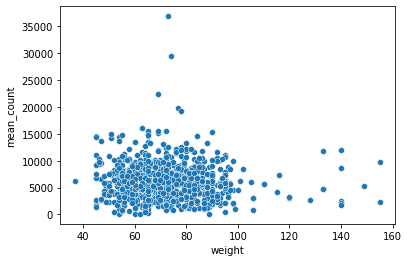

In [24]:
sns.scatterplot(data=df_new, x="weight", y="mean_count")

<AxesSubplot:xlabel='height', ylabel='mean_count'>

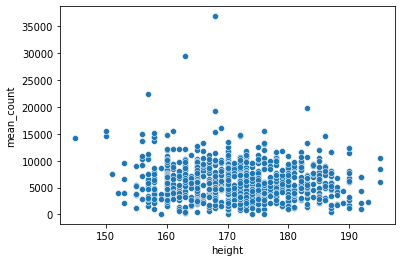

In [25]:
sns.scatterplot(data=df_new, x="height", y="mean_count")

Correlation

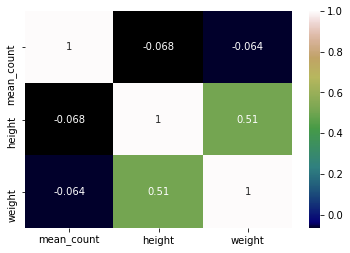

In [26]:
sns.heatmap(df_new.corr(), annot=True, cmap=plt.cm.gist_earth)
plt.show()

In [36]:
corr = df_new[['mean_count','height','weight']].corr()
corr

,mean_count,height,weight
mean_count,1.000000,-0.068123,-0.063915
height,-0.068123,1.000000,0.510145
weight,-0.063915,0.510145,1.000000


Conclusion: As the numbers indicated in the chart above, there is a positive correlation between weight and height, but not mean steps count and weight or mean steps count with height.

Prompt: The relation of mean steps per participant with a categorical variable with two levels (e.g. gender, weekday vs weekend)
- Graphs of the relation (e.g. histogram, violin plot, bar plot)
- Verbal description of the relation

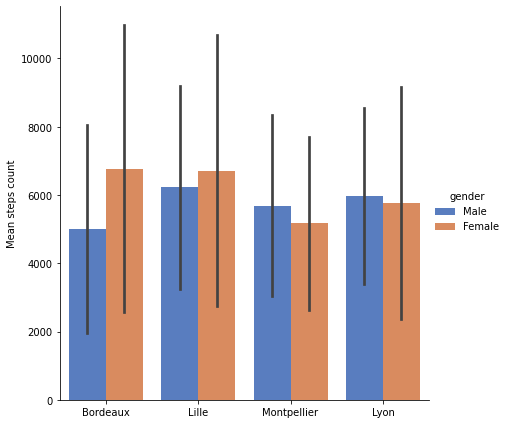

In [37]:
#city vs. gender bar plot
b = sns.catplot(
    data=df_new, kind="bar",
    x="city", y="mean_count", hue="gender",
    ci="sd", palette="muted", height=6
)
b.set_axis_labels("", "Mean steps count")

Females are taking more steps than males in the cities of Bordeaux and Lille. But there is a more concentrated range of people taking similar steps in Lyon and Montpellier as we can see the line is shorter on mean steps taken.

The relation between two categorical variables
- Graphs of the relation (e.g., bar plot)
- Cross table with relevant percentages
- Verbal description of the relation

Two categorical variables

<AxesSubplot:xlabel='gender', ylabel='mean_count'>

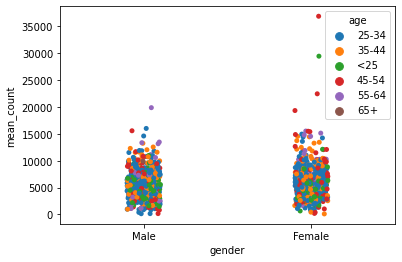

In [38]:
sns.stripplot(x="gender", y="mean_count", hue="age", data=df_new)

In [39]:
pd.crosstab(df_new.city, columns=[df_new.gender]).apply(lambda row: row/row.sum(), axis=1)

gender,Female,Male
city,,
Bordeaux,0.433071,0.566929
Lille,0.496994,0.503006
Lyon,0.464789,0.535211
Montpellier,0.392157,0.607843
